<a href="https://colab.research.google.com/github/Hero0963/kaggle/blob/main/kaggle_explore_multi_label_classification/kaggle_explore_multi_label_classification_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dataset：https://www.kaggle.com/competitions/playground-series-s3e18/data

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle competitions download -c playground-series-s3e18

 83% 2.00M/2.41M [00:01<00:00, 2.22MB/s]
100% 2.41M/2.41M [00:01<00:00, 2.25MB/s]


In [ ]:
import zipfile
import pandas as pd

# 解壓縮zip檔案
with zipfile.ZipFile('/content/playground-series-s3e18.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')

In [ ]:
df = pd.read_csv('/content/extracted_folder/train.csv')

In [ ]:
display(df.head(10))

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0
5,5,144.973737,5.540111,3.481748,3.481748,2.481029,2.481029,1.512478,0.671209,36.929927,...,9.589074,43.333333,1,1,1,0,0,1,0,0
6,6,397.378253,7.630229,4.050364,4.050364,2.427901,2.427901,1.920495,1.120915,0.000000,...,4.736863,42.166667,0,0,0,1,1,0,0,0
7,7,406.268445,10.756127,5.985559,5.985559,4.248141,4.248141,2.837764,1.718439,42.723899,...,18.947452,53.666667,0,0,0,1,1,0,0,0
8,8,626.949462,8.343337,4.431698,7.460918,3.381446,6.071115,2.936652,1.770579,52.958168,...,31.961948,61.666667,0,0,0,1,1,0,0,0
9,9,31.019550,1.414214,0.492799,0.492799,0.117851,0.117851,0.000000,0.000000,0.000000,...,4.794537,13.833333,0,0,1,1,1,0,0,0


In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [ ]:
df.describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,7418.500000,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,...,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,4283.505982,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,...,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3709.250000,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,...,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7418.500000,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,...,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11127.750000,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,...,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,14837.000000,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,...,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
unique_counts = df.nunique()
display(unique_counts)

id                   14838
BertzCT               2368
Chi1                  1259
Chi1n                 3157
Chi1v                 3306
Chi2n                 3634
Chi2v                 3725
Chi3v                 3448
Chi4n                 2930
EState_VSA1            719
EState_VSA2            445
ExactMolWt            1666
FpDensityMorgan1       556
FpDensityMorgan2       650
FpDensityMorgan3       654
HallKierAlpha          388
HeavyAtomMolWt         860
Kappa3                2245
MaxAbsEStateIndex     2356
MinEStateIndex        2142
NumHeteroatoms          40
PEOE_VSA10             250
PEOE_VSA14             291
PEOE_VSA6              219
PEOE_VSA7              262
PEOE_VSA8              237
SMR_VSA10              409
SMR_VSA5               492
SlogP_VSA3             217
VSA_EState9           1946
fr_COO                   8
fr_COO2                  8
EC1                      2
EC2                      2
EC3                      2
EC4                      2
EC5                      2
E

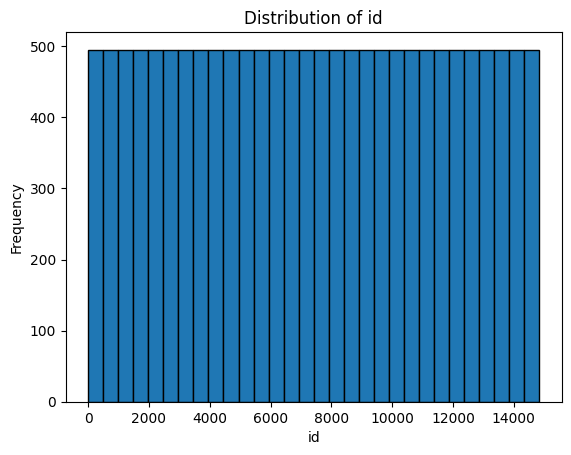

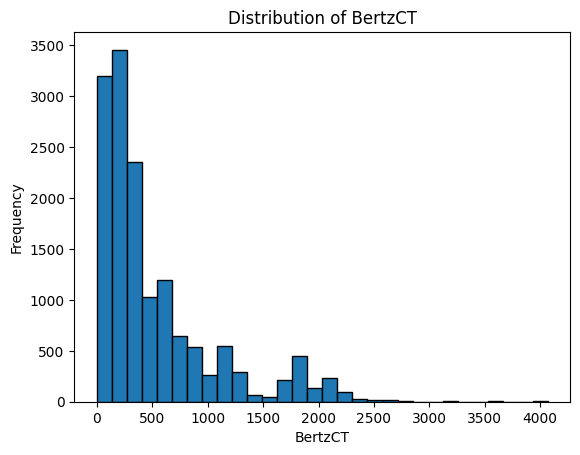

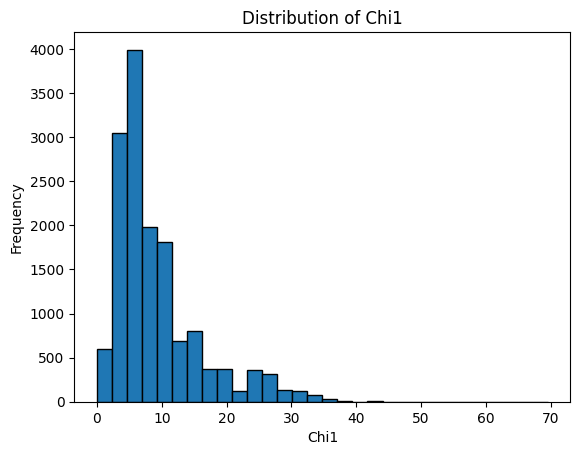

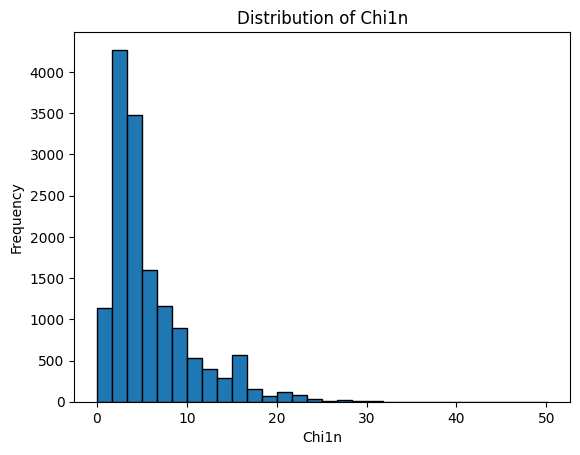

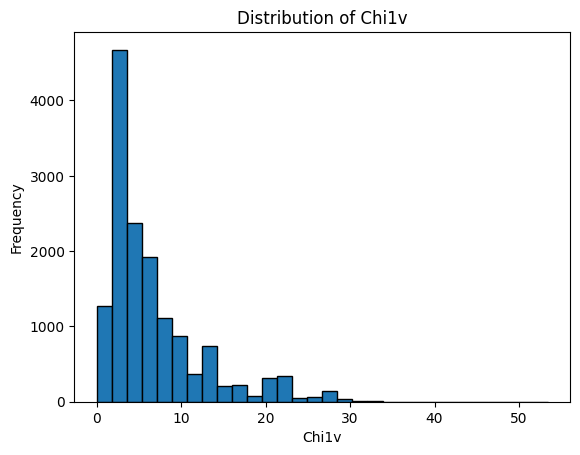

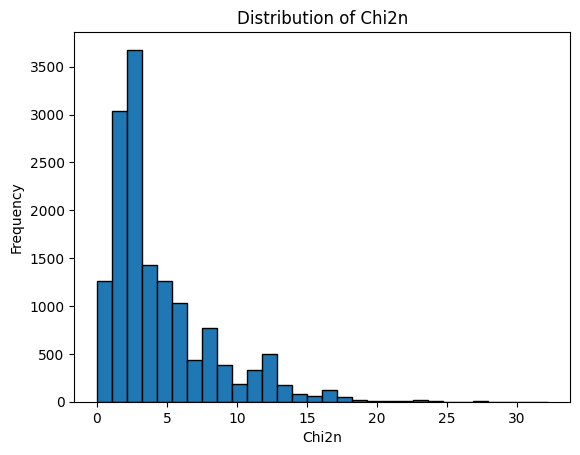

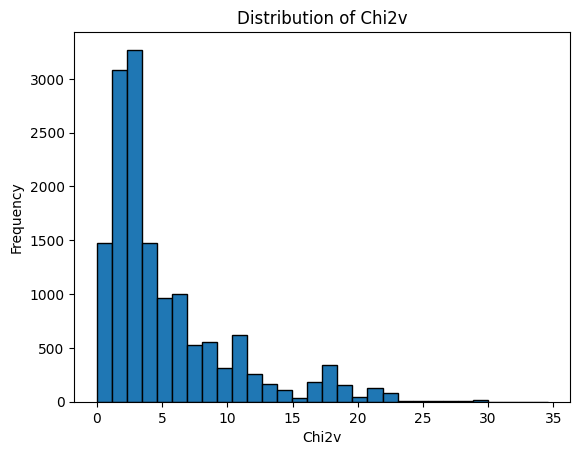

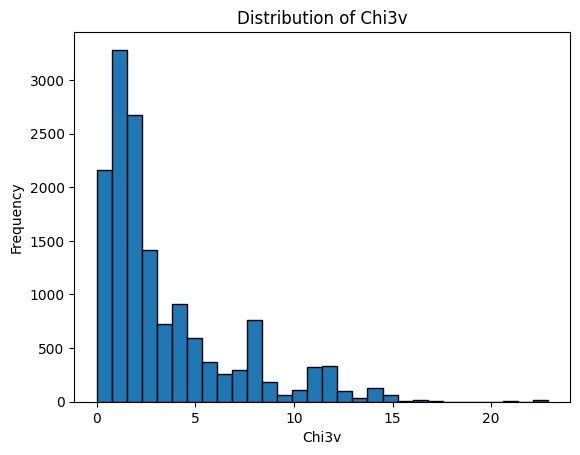

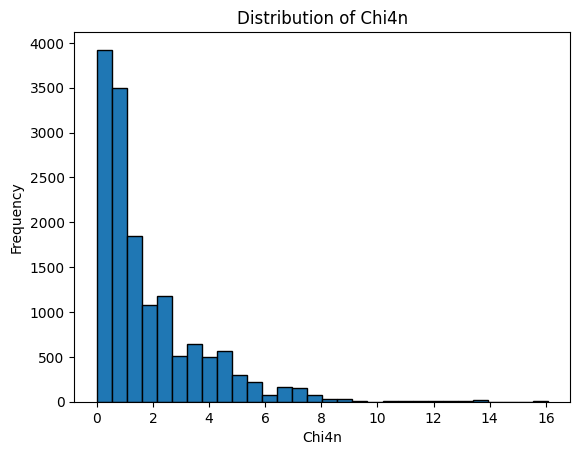

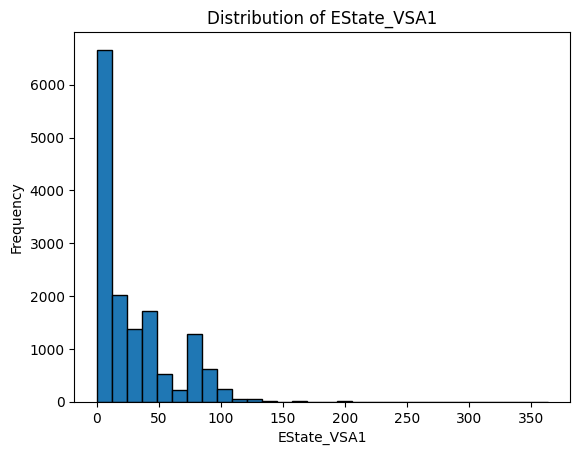

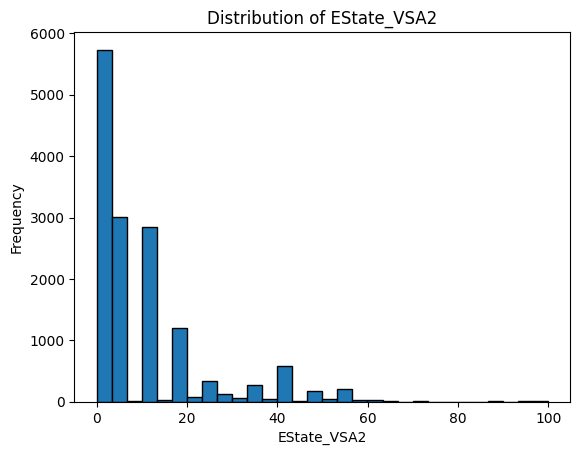

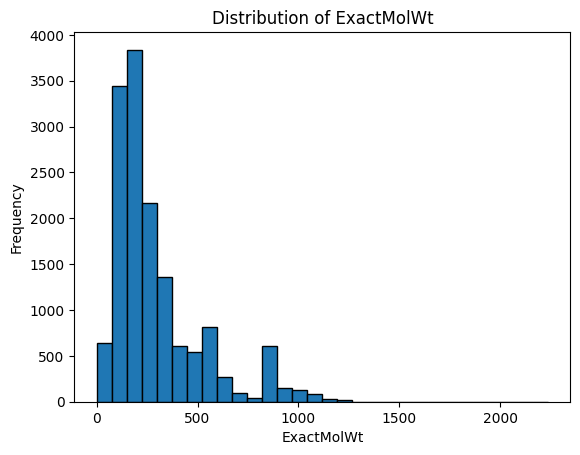

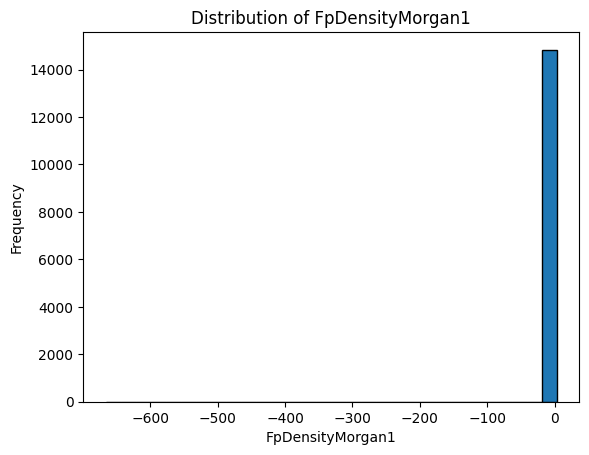

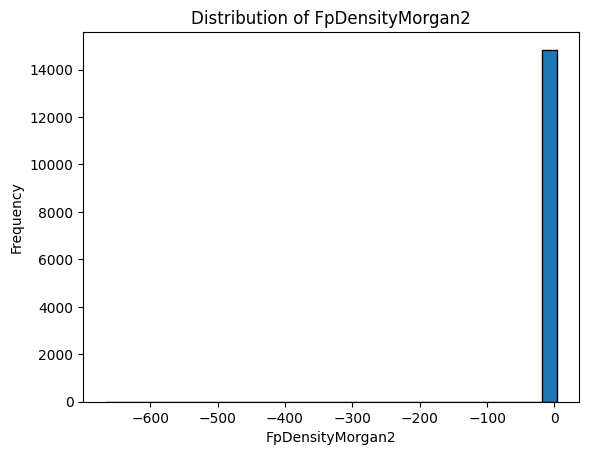

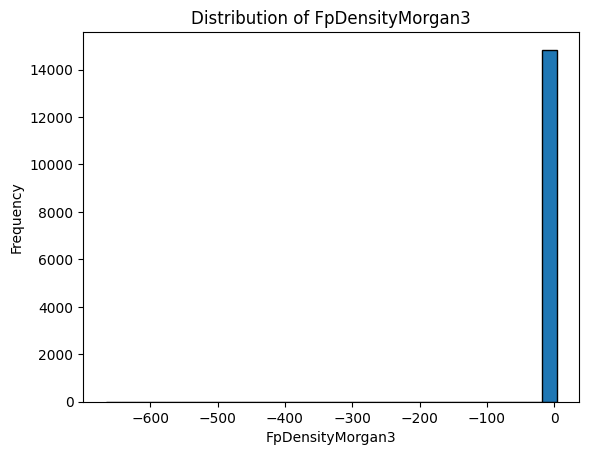

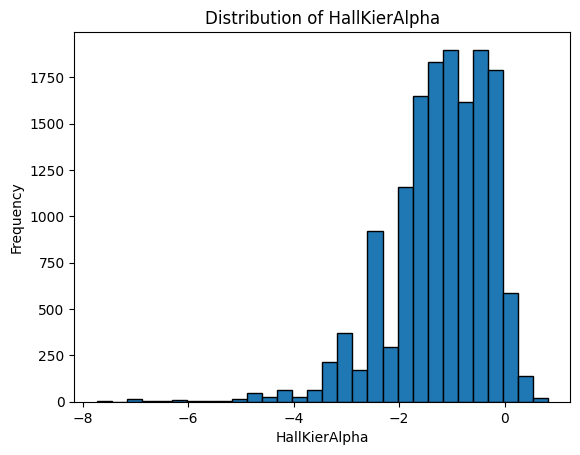

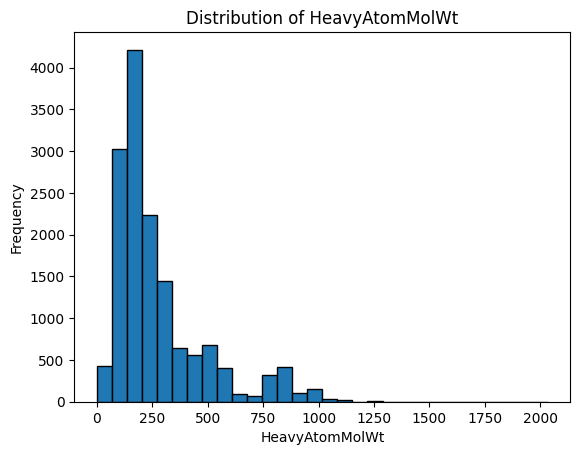

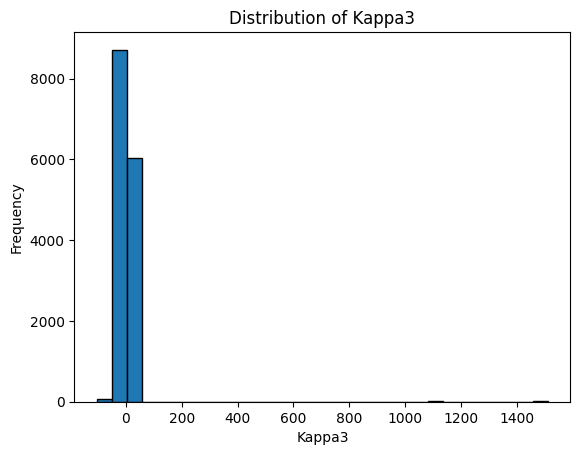

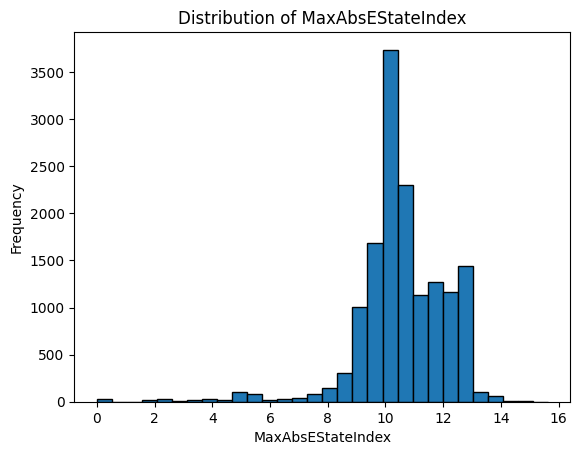

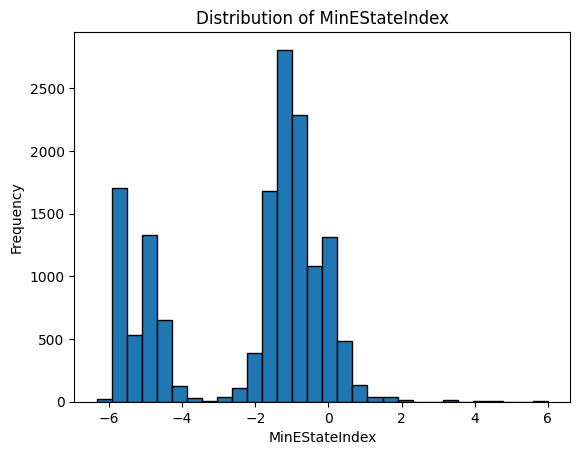

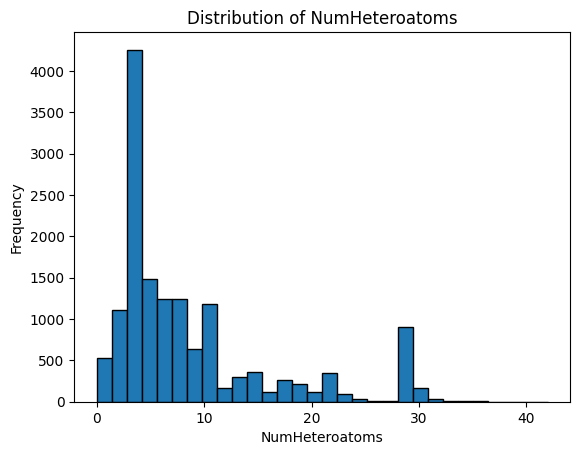

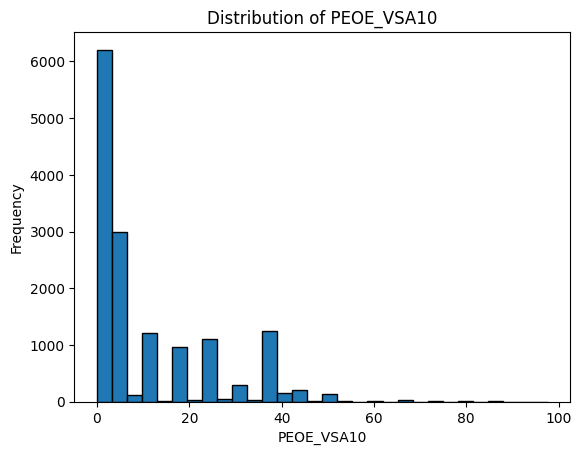

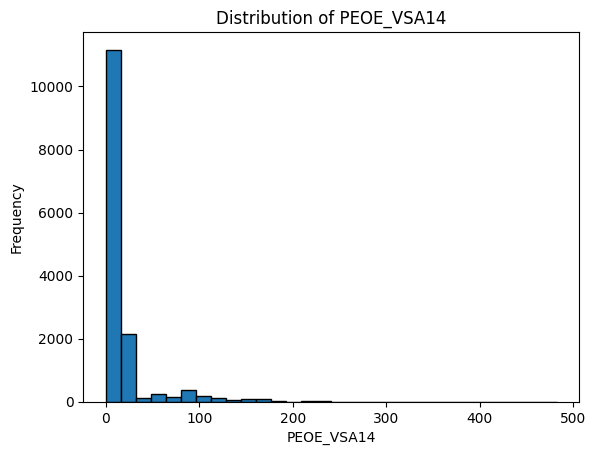

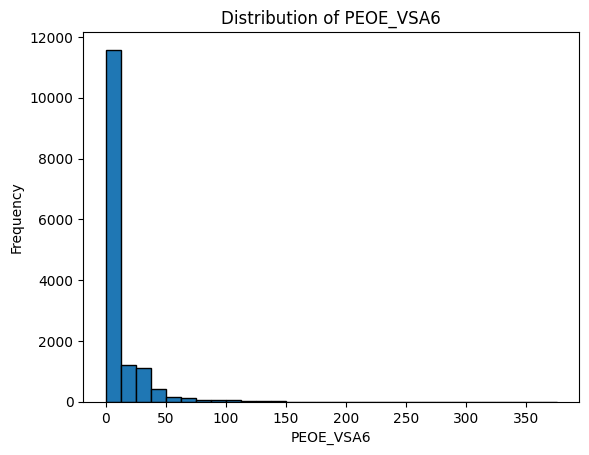

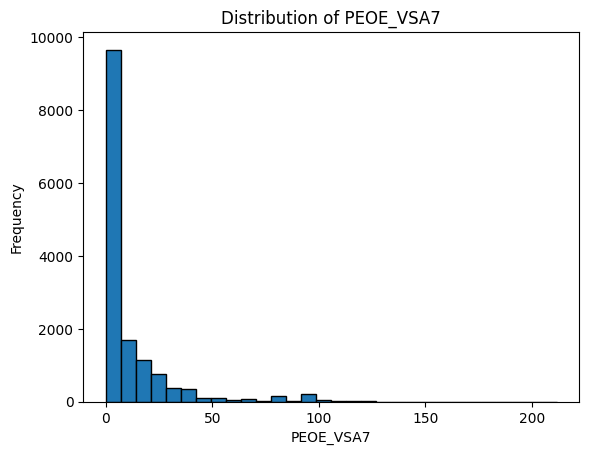

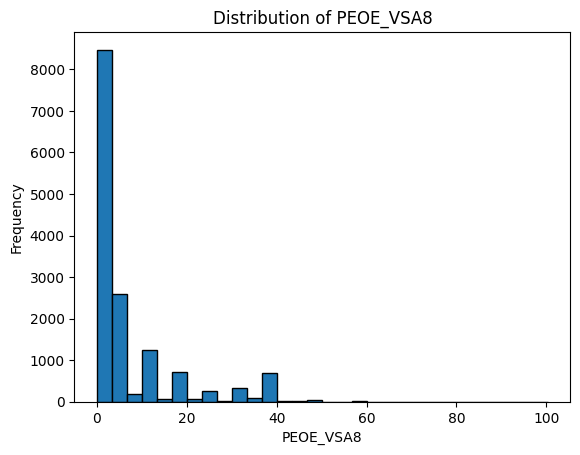

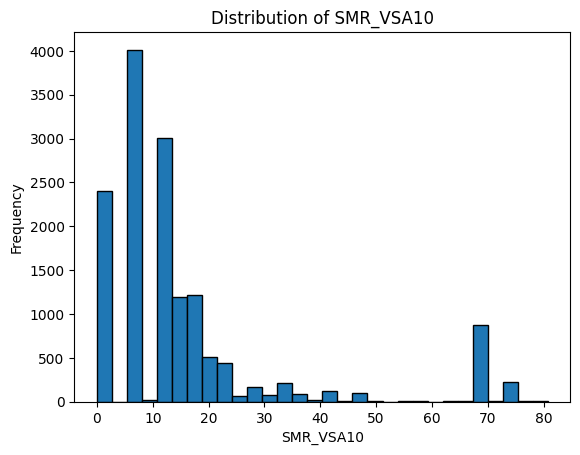

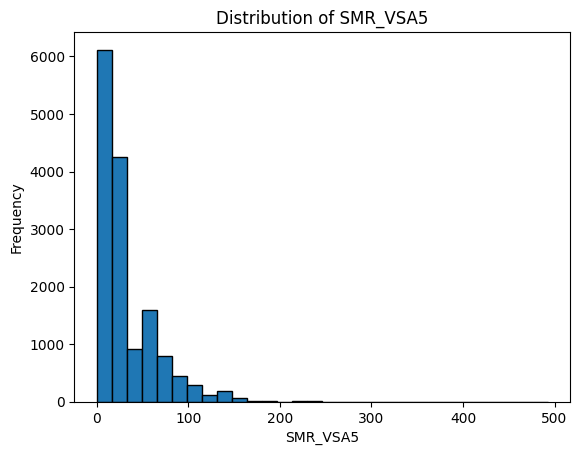

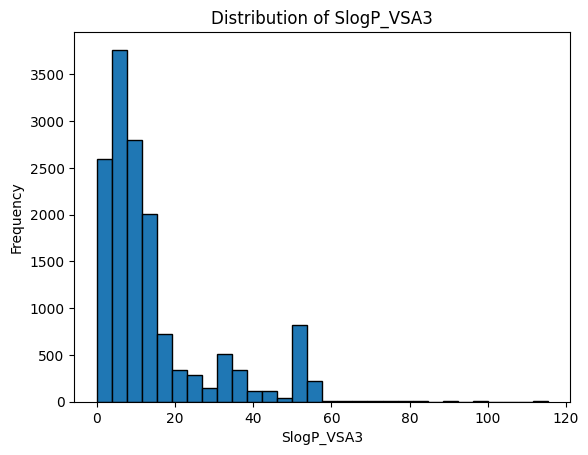

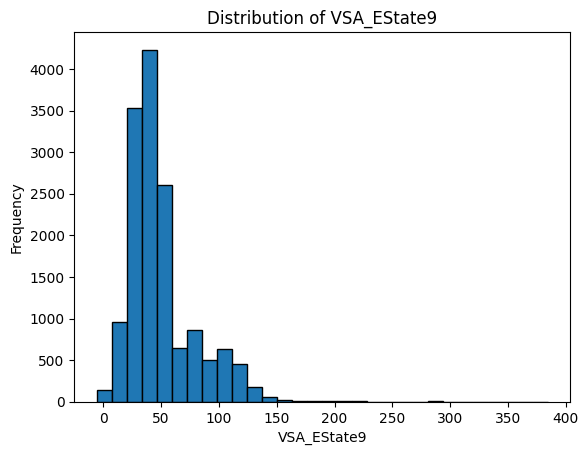

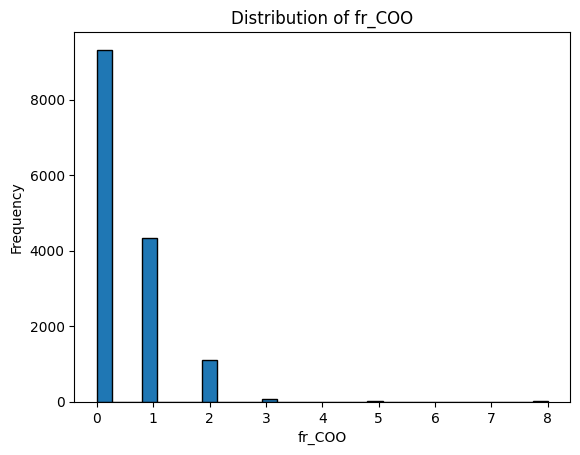

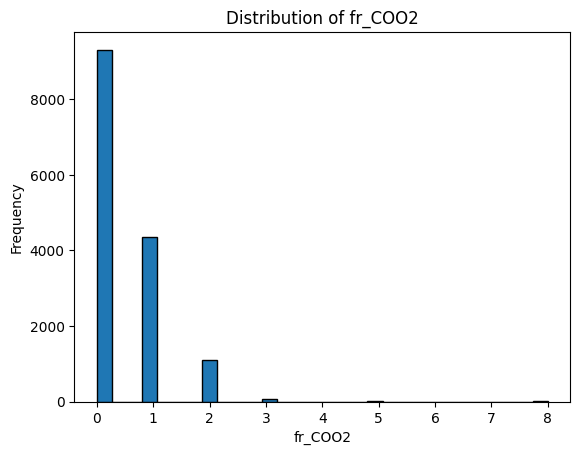

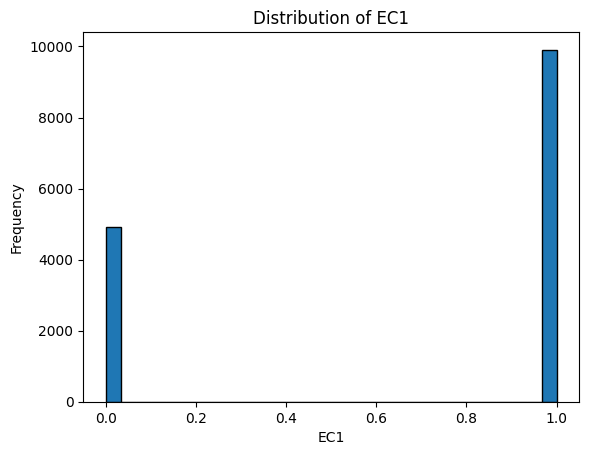

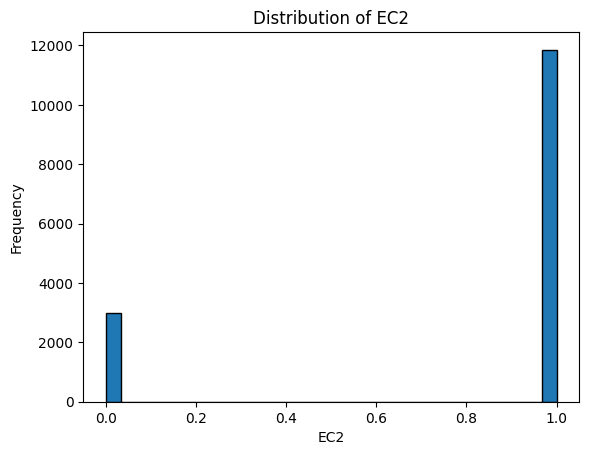

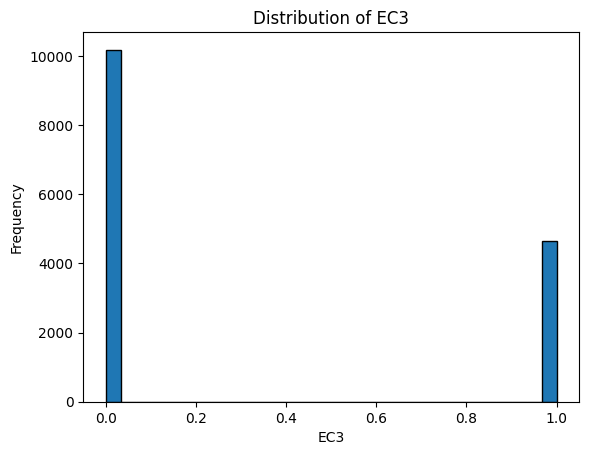

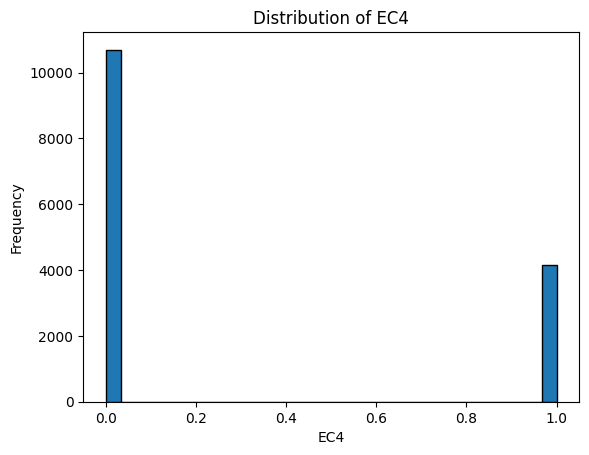

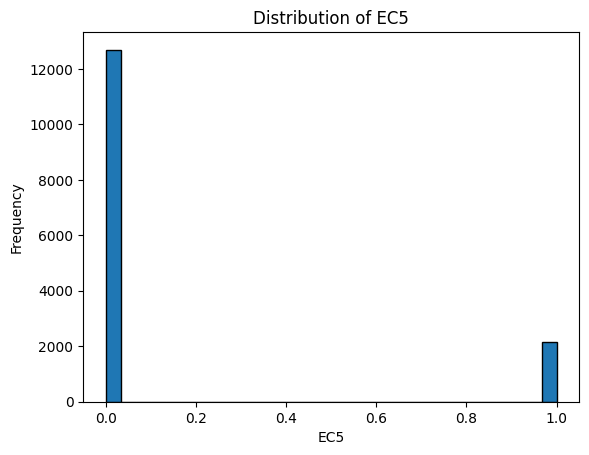

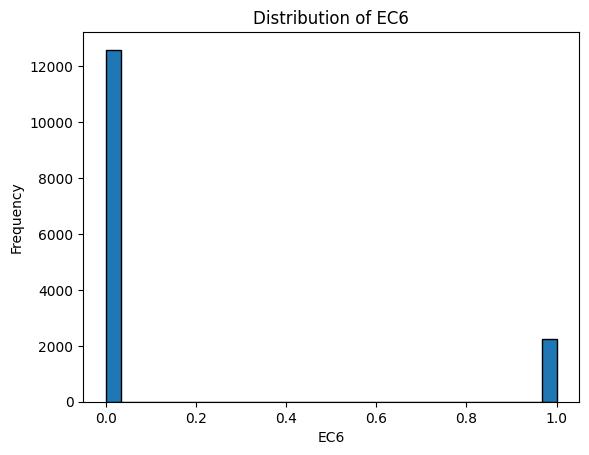

In [ ]:
import matplotlib.pyplot as plt

for column in df.columns:
    if df[column].dtype == 'object':
        pass

    else:
        plt.figure()
        df[column].plot(kind='hist', bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

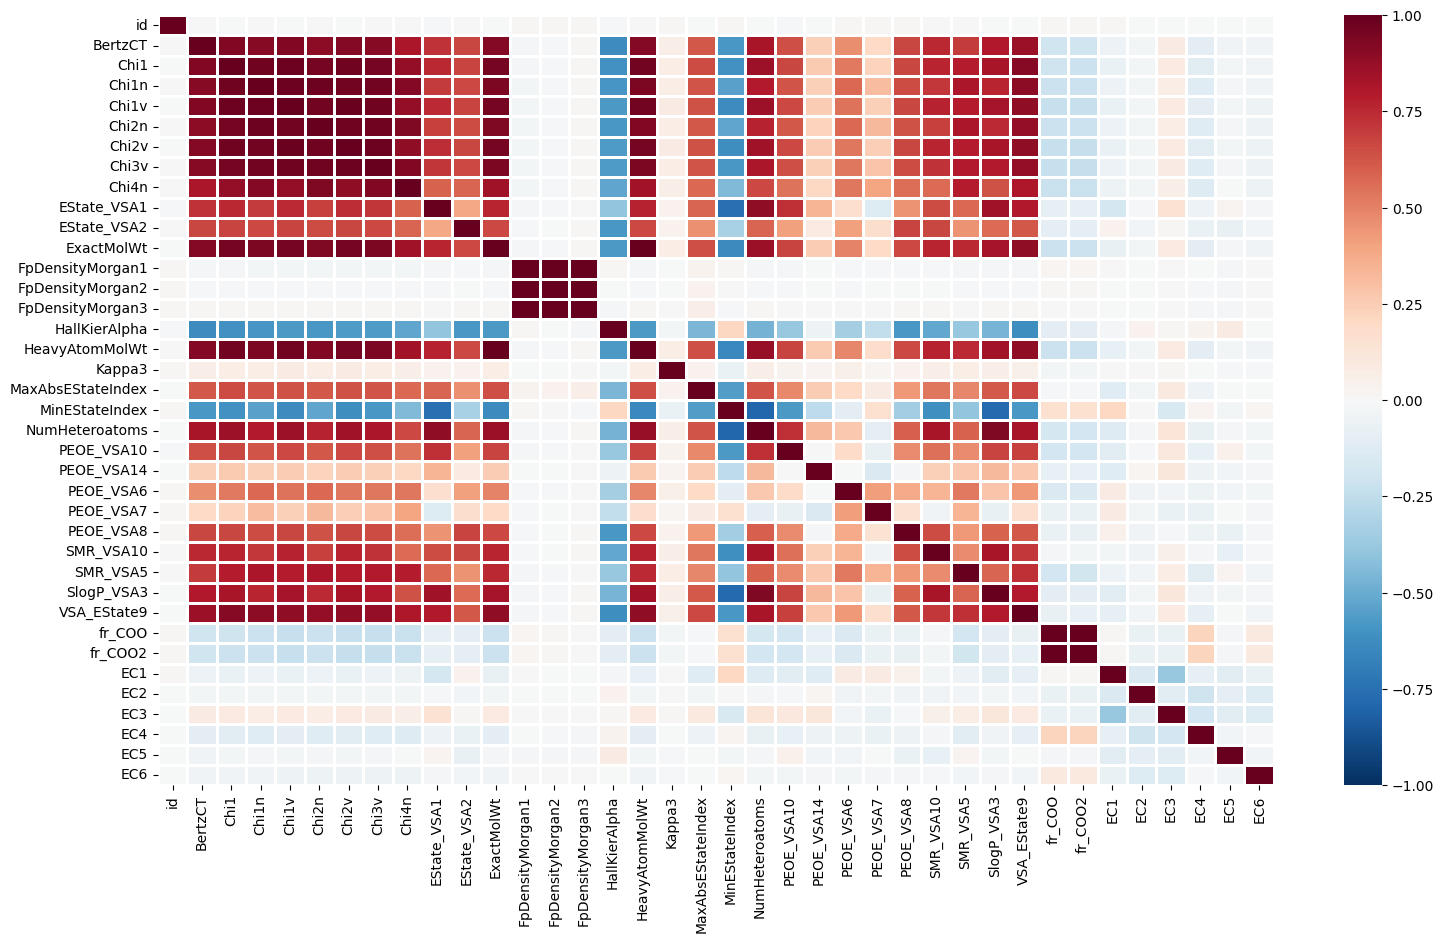

In [ ]:
import seaborn as sns

# 比較每個特徵間的關聯程度
fig, ax = plt.subplots(figsize = (18, 10))

# 設定熱力圖的中心值為0，使正相關和負相關的區域都顯示為紅色
sns.heatmap(df.corr(), annot=False, linewidth=1, ax=ax, cmap='RdBu_r', center=0, vmin=-1, vmax=1)
plt.show()

# 找出高度正相關的特徵們

In [ ]:

correlations_EC1 = df.corr()['EC1'].abs().sort_values(ascending=False)
display(correlations_EC1)


EC1                  1.000000
EC3                  0.375570
MinEStateIndex       0.208827
EState_VSA1          0.173752
EC2                  0.146059
NumHeteroatoms       0.127448
PEOE_VSA14           0.123488
MaxAbsEStateIndex    0.122893
PEOE_VSA10           0.115469
EC5                  0.112205
SlogP_VSA3           0.109439
VSA_EState9          0.093636
EC4                  0.091273
PEOE_VSA6            0.084942
PEOE_VSA7            0.083718
HeavyAtomMolWt       0.078682
ExactMolWt           0.075954
Chi1                 0.069660
Chi1v                0.065679
Chi2v                0.064649
EC6                  0.063344
Chi3v                0.061797
BertzCT              0.060120
SMR_VSA5             0.056336
Chi2n                0.056264
Chi1n                0.055030
Chi4n                0.054333
PEOE_VSA8            0.052619
EState_VSA2          0.040751
SMR_VSA10            0.025373
HallKierAlpha        0.020765
fr_COO2              0.014989
fr_COO               0.014353
id        

In [ ]:
correlations_EC2 = df.corr()['EC2'].abs().sort_values(ascending=False)
display(correlations_EC2)

EC2                  1.000000
EC4                  0.206008
EC1                  0.146059
EC6                  0.139678
EC3                  0.112329
EC5                  0.096506
fr_COO               0.068516
fr_COO2              0.067992
PEOE_VSA8            0.044334
SMR_VSA10            0.041555
PEOE_VSA6            0.040313
HallKierAlpha        0.039798
EState_VSA2          0.034391
VSA_EState9          0.034380
SMR_VSA5             0.031442
MaxAbsEStateIndex    0.031225
SlogP_VSA3           0.031082
PEOE_VSA7            0.030671
ExactMolWt           0.030487
Chi1n                0.030101
Chi4n                0.030007
Chi1v                0.029933
HeavyAtomMolWt       0.029901
Chi3v                0.029776
Chi2v                0.028716
Chi1                 0.027768
Chi2n                0.027566
BertzCT              0.024188
PEOE_VSA14           0.017258
NumHeteroatoms       0.016646
EState_VSA1          0.012578
PEOE_VSA10           0.010913
id                   0.005180
FpDensityM

In [ ]:
display(type(correlations_EC1))

pandas.core.series.Series

In [ ]:
EC1_index_list = correlations_EC1.index.tolist()
display(EC1_index_list)

['EC1',
 'EC3',
 'MinEStateIndex',
 'EState_VSA1',
 'EC2',
 'NumHeteroatoms',
 'PEOE_VSA14',
 'MaxAbsEStateIndex',
 'PEOE_VSA10',
 'EC5',
 'SlogP_VSA3',
 'VSA_EState9',
 'EC4',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'Chi1',
 'Chi1v',
 'Chi2v',
 'EC6',
 'Chi3v',
 'BertzCT',
 'SMR_VSA5',
 'Chi2n',
 'Chi1n',
 'Chi4n',
 'PEOE_VSA8',
 'EState_VSA2',
 'SMR_VSA10',
 'HallKierAlpha',
 'fr_COO2',
 'fr_COO',
 'id',
 'FpDensityMorgan3',
 'Kappa3',
 'FpDensityMorgan2',
 'FpDensityMorgan1']

In [ ]:
EC2_index_list = correlations_EC2.index.tolist()
display(EC2_index_list)

['EC2',
 'EC4',
 'EC1',
 'EC6',
 'EC3',
 'EC5',
 'fr_COO',
 'fr_COO2',
 'PEOE_VSA8',
 'SMR_VSA10',
 'PEOE_VSA6',
 'HallKierAlpha',
 'EState_VSA2',
 'VSA_EState9',
 'SMR_VSA5',
 'MaxAbsEStateIndex',
 'SlogP_VSA3',
 'PEOE_VSA7',
 'ExactMolWt',
 'Chi1n',
 'Chi4n',
 'Chi1v',
 'HeavyAtomMolWt',
 'Chi3v',
 'Chi2v',
 'Chi1',
 'Chi2n',
 'BertzCT',
 'PEOE_VSA14',
 'NumHeteroatoms',
 'EState_VSA1',
 'PEOE_VSA10',
 'id',
 'FpDensityMorgan3',
 'FpDensityMorgan2',
 'FpDensityMorgan1',
 'Kappa3',
 'MinEStateIndex']

In [ ]:
selected_features_EC1 = set()
excluded_features = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']
for i in range(min(15, len(EC1_index_list))):
    feat = EC1_index_list[i]
    if feat not in excluded_features:
        selected_features_EC1.add(feat)


In [ ]:
selected_features_EC2 = set()
excluded_features = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']
for i in range(min(15, len(EC2_index_list))):
    feat = EC2_index_list[i]
    if feat not in excluded_features:
        selected_features_EC2.add(feat)

In [ ]:
features_EC1 = df.columns.intersection(selected_features_EC1)
selected_df_EC1 = df.loc[:, features_EC1]
display(selected_df_EC1)

,EState_VSA1,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,SlogP_VSA3,VSA_EState9
0,0.000000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,4.794537,35.527357
1,45.135471,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,13.825658,44.707310
2,15.645394,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,17.964475,45.660120
3,95.639554,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,31.961948,87.509997
4,17.980451,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,9.589074,33.333333
...,...,...,...,...,...,...,...,...,...,...
14833,32.971529,11.426427,-5.077909,16,17.248535,15.645394,0.000000,13.847474,18.947452,61.376610
14834,0.000000,5.506944,0.250000,0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
14835,17.248535,12.118907,-0.446105,8,34.480943,0.000000,0.000000,0.000000,0.000000,66.666667
14836,45.623794,10.909292,-4.181527,7,0.000000,7.822697,19.420579,0.000000,9.088795,45.583333


In [ ]:
X = selected_df_EC1
y = df['EC1']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf1 = RandomForestClassifier(n_estimators=200)
rf1.fit(X_train, y_train)
y_pred = rf1.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6776267467410626


In [ ]:
features_EC2 = df.columns.intersection(selected_features_EC2)
selected_df_EC2 = df.loc[:, features_EC2]
display(selected_df_EC2)

,EState_VSA2,HallKierAlpha,PEOE_VSA6,PEOE_VSA8,SMR_VSA10,SMR_VSA5,VSA_EState9,fr_COO,fr_COO2
0,11.938294,-0.24,0.000000,0.000000,17.744066,0.000000,35.527357,0,0
1,0.000000,-0.09,0.000000,0.000000,7.822697,30.705892,44.707310,0,0
2,6.606882,-0.78,0.000000,0.000000,15.645394,73.143616,45.660120,0,0
3,0.000000,-1.30,0.000000,6.420822,15.645394,62.107304,87.509997,0,0
4,12.841643,-1.10,6.923737,0.000000,11.938611,18.883484,33.333333,2,2
...,...,...,...,...,...,...,...,...,...
14833,6.606882,-1.87,0.000000,6.923737,34.407699,32.607024,61.376610,0,0
14834,0.000000,-0.53,0.000000,6.066367,0.000000,6.420822,10.000000,0,0
14835,0.000000,-3.15,0.000000,23.762553,10.969244,0.000000,66.666667,0,0
14836,0.000000,-0.44,19.420579,0.000000,7.822697,108.961047,45.583333,0,0


In [ ]:
X = selected_df_EC2
y = df['EC2']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf2 = RandomForestClassifier(n_estimators=200)
rf2.fit(X_train, y_train)
y_pred = rf2.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5378535798122066


# X-Test

In [ ]:
df_test = pd.read_csv('/content/extracted_folder/test.csv')

In [ ]:
display(df_test.head(10))

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0
5,14843,1137.887749,16.098662,13.766683,13.766683,11.726594,11.726594,8.942518,4.794559,101.198915,...,15.645394,0.000000,0.000000,0.000000,15.645394,83.973597,22.701338,99.666667,0,0
6,14844,751.873583,10.701907,5.797322,5.797322,4.879495,4.879495,3.978973,2.339464,30.246644,...,5.969305,0.000000,0.000000,6.420822,17.744066,24.856656,9.589074,54.759824,0,0
7,14845,212.538082,6.011637,3.971007,3.971007,2.991564,3.662308,1.529818,0.729734,0.000000,...,40.672834,0.000000,0.000000,0.000000,17.744066,12.207933,4.794537,31.855507,0,0
8,14846,102.605938,3.060660,2.268581,4.577317,1.400073,3.310756,1.261160,0.250847,5.969305,...,51.955228,0.000000,0.000000,0.000000,10.969244,0.000000,4.794537,24.587691,1,1
9,14847,1035.562064,16.188780,10.881507,10.881507,8.028107,8.028107,7.954600,5.796537,9.150140,...,42.303984,12.132734,37.964482,11.835812,27.521879,38.269884,9.589074,79.416667,0,0


In [ ]:
test_EC1 = df_test.columns.intersection(selected_features_EC1)
test_X_EC1 = df_test.loc[:, test_EC1]
display(test_X_EC1)

,EState_VSA1,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,SlogP_VSA3,VSA_EState9
0,49.458581,10.248693,-4.734642,7,18.311899,13.512441,0.000000,0.000000,4.794537,47.304082
1,0.000000,11.917927,-0.303333,4,0.000000,0.000000,34.947374,98.323987,0.000000,43.166667
2,5.969305,9.694444,-0.833333,3,0.000000,5.969305,0.000000,0.000000,9.589074,24.666667
3,0.000000,10.215871,0.291343,6,0.000000,59.935299,0.000000,0.000000,4.794537,26.778866
4,84.554972,12.642250,-5.570647,20,36.259886,23.468091,25.609359,0.000000,50.697492,102.583333
...,...,...,...,...,...,...,...,...,...,...
9888,24.146543,10.261759,-1.141574,5,12.207933,11.938611,0.000000,0.000000,9.589074,30.000000
9889,0.000000,12.271660,-0.336257,5,5.749512,0.000000,18.199101,37.107112,0.000000,53.166667
9890,36.705949,10.367703,-1.834815,10,24.918781,7.822697,0.000000,0.000000,4.736863,50.652870
9891,36.992053,11.550030,-1.568935,12,36.259886,0.000000,0.000000,0.000000,9.589074,50.250000


In [ ]:
predicted_labels_EC1 = rf1.predict_proba(test_X_EC1)[:, 1]

In [ ]:
test_EC2 = df_test.columns.intersection(selected_features_EC2)
test_X_EC2 = df_test.loc[:, test_EC2]
predicted_labels_EC2 = rf2.predict_proba(test_X_EC2)[:, 1]

In [ ]:
submission = pd.DataFrame({'id': df_test['id'], 'EC1': predicted_labels_EC1, 'EC2': predicted_labels_EC2})
submission['EC1'] = submission['EC1'].astype(float) # convert_data_type_important
submission['EC2'] = submission['EC2'].astype(float) # convert_data_type_important
submission.to_csv('rf.csv', index=False)